In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
#read crypto data into pandas
crypto_df = pd.read_csv('instructions/crypto_data.csv')
print(len(crypto_df))
crypto_df.head()

1252


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#Clean and prepare the data
#drop all crypto that are not being traded
crypto_df = crypto_df.loc[crypto_df['IsTrading'] != False]

#drop the IsTrading Column as it provides no additional value to machine learning
crypto_df.drop('IsTrading', axis=1, inplace = True)

#remove all rows with at least one null value
crypto_df.dropna(inplace = True)

#only include cryptocurrencies that have been mined
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined'] > 0]

#remove unique names as they are untrainable for classifications
crypto_df.drop(columns=crypto_df.columns[0], axis=1, inplace = True)
crypto_df.drop('CoinName', axis=1, inplace = True)

#turn categories into binary classifications
crypto_df = pd.get_dummies(crypto_df)

#verify that cleanup occurred
print(len(crypto_df))
crypto_df.head()

532


,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#standardize the data to avoid unnecessary outlier influence
scaler = StandardScaler()

#fit and transform the scaled data into a new dataframe
crypto_scaled_df = scaler.fit_transform(crypto_df)

In [5]:
#perform dimensionality reduction with PCA
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the data.
crypto_pca = pca.fit_transform(crypto_scaled_df)

# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(crypto_pca)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,-0.267092,-0.116294,6.640412e-15,1.631338e-15,0.029497,1.514572,-0.340449,0.089601,-1.867751,-0.424150,...,-9.324219e-02,-9.993137e-01,2.486574e-02,-1.090208e+00,-1.425807e+00,-1.027549e+00,5.316360e-01,9.805579e-01,-3.383827e-02,4.809215e-01
1,-0.249925,-0.117273,6.520138e-15,2.815435e-15,0.025167,1.513565,-0.340359,0.089820,-1.869831,-0.424478,...,6.536982e-01,-5.685677e-01,7.973454e-01,-1.467896e+00,-3.786138e-01,-9.945285e-01,1.095017e+00,3.126169e-01,1.280260e+00,2.464165e-01
2,0.314746,-0.002862,2.969757e-15,2.169512e-15,-0.081839,2.496209,-0.409761,-0.375692,-1.377915,0.000210,...,1.109797e-01,-9.962845e-01,-2.401562e+00,6.421734e-01,9.635309e-01,2.147100e+00,-3.037294e+00,-8.847374e-01,3.299766e-01,-1.360288e+00
3,-0.250886,-0.222136,-5.949275e-15,-3.126957e-15,0.000999,-1.566613,0.156332,-0.120727,0.360156,0.209244,...,1.167843e-15,-5.981108e-15,4.005690e-15,-5.006159e-17,-7.822123e-16,-3.922951e-15,1.717738e-15,3.767135e-16,2.001173e-15,-4.755225e-15
4,-0.119293,-0.222472,6.485391e-15,-4.855555e-15,-0.042473,-1.511262,0.136779,-0.073247,0.419963,0.077902,...,6.149753e-16,7.747031e-16,1.739758e-15,3.105696e-15,3.491796e-15,-4.449224e-16,1.917985e-15,-3.536226e-15,-1.579971e-15,-4.144161e-15


EXPLANATION: 

The number of features after dimensionality reduction decreased since only 90% of the explained variance is retained. Since the dummies include some traded algorithms that are less used, these outliers would be removed and no longer contribute to the reduced dataframe.

In [6]:
#Further reduce the dataset with t-SNE
#run on principal components, the output of the PCA transformation

# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(df_crypto_pca)

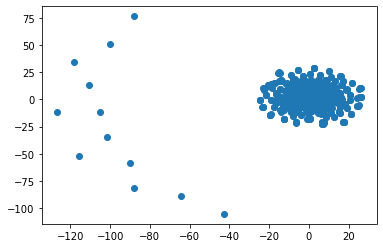

In [8]:
#create a scatterplot of the t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

OBSERVATION:

There is definitely one distinct cluster and what seems to the leftmost part of an orbit.

In [16]:
#Cluster Analysis with k-Means
#create an elbow plot to identify the best number of clusters.
from sklearn.cluster import KMeans

#initiate variables to store determined inertia for each k between 1 through 10
inertia = []
k = list(range(1, 11))

#use a for loop to determine the inertia
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_scaled_df)
    inertia.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [17]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,200564.000000
1,2,199494.665681
2,3,198010.191527
3,4,197334.539391
4,5,195500.210981


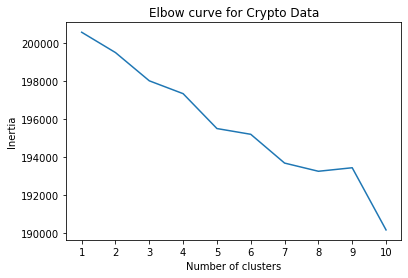

In [18]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Crypto Data')
plt.show()

OBSERVATIONS:

Using the scaled dataset, there does not seem to be an "elbow" of inertia values, although if one had to be chosen to avoid using an excessive number of neighbors, the sharpest turn seems to be at k values 5 and 7.

CONCLUSION:

Based on these findings, cryptocurrencies seem to be part of the same cluster, with outliers that strictly underperform. With this data alone, it does not seem to be wise to attempt a classification system based on price and number of coins mined alone. Additional data on usage may change this outcome.